## Excercise 2
**(PSO) [2 points] Consider a particle “swarm” consisting of a single member.**

**How would it perform in a trivial task such as the minimization of f(x) = $x^2$ when ω < 1,
assuming the particle starts with the velocity pointing away from the optimum (e.g.
in a state with velocity v = 10; position x = 20)?**


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

class PSO ():
    
    def __init__ (self, x,  v, w, a, b):
        self.x = x
        self.v = v
        self.w = w
        self.a = a
        self.b = b
        self.best_x = x.copy()
        self.g = x[0]
        self.hist = []

    def f (self, x):
        return x**2
    
    def get_fitness (self):
        for i in range(len(self.x)):
            fitness = self.f(self.x[i])
            x = self.x[i]
            v = self.v[i]
    
    def plot_fitness (self):
        x = [x for x in range(len(self.hist))]
        y = [x for x in self.hist]
        plt.xlabel('Epoch')
        plt.ylabel('Resulting value (lower is better)')
        plt.title('Plot of the fitness of a swarm with only one particle, initialised with the velocity pointing in the wrong direction')
        plt.plot(x,y)
        plt.plot()
        
    
    def update(self):
        r1 = 0.5
        r2 = 0.5
        
        #update velocities
        for i in range(len(self.v)):
            self.hist.append(self.f(self.x[i]))
            term1 = self.w * self.v[i] 
            term2 =  self.a * r1  * (self.best_x[i] - self.x[i])
            term3 = self.a * r2  * (self.best_x[i] - self.x[i])
            self.v[i] = term1 + term2 + term3
          
         #update positions and global best
        for i in range(len(self.v)):
            self.x[i] = self.x[i] + self.v[i]
            #print(self.x[i], self.best_x[i])
            self.best_x[i] = self.x[i] if (self.f(self.x[i]) < self.f(self.best_x[i])) else self.best_x[i]
            self.g = self.x[i] if (self.f(self.x[i]) < self.f(self.g)) else self.g
    def run(self):
        for i in range(20):
            self.get_fitness()
            self.update()

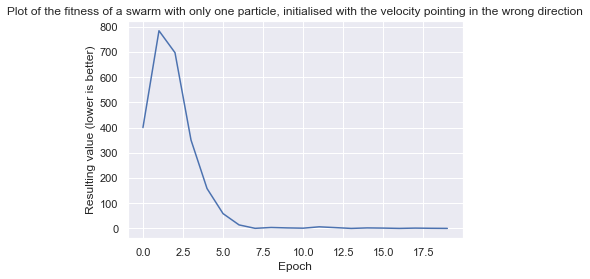

In [2]:
#particle:
x = [20]
#weight:
w = 0.8
#alpha_1 and alpha_2:
a = 1
b = 1

#vecolicity
v=[10]

#Run the PSO algorithm:
swarm = PSO(x=x, w=w, a=a, b=b, v=v)
swarm.run()
swarm.plot_fitness()

## Exercise 5

**(ACO) [2 point] The figure below shows an example of an instance of a sourcedestination problem from the ACO book by Dorigo and Stuetzle. The goal is to
reach the destination node from the source one using a shortest path through the
given graph. What results do you expect for an ant colony algorithm that does not
use tabu lists (except for inhibition of immediate return to the previous node)?**


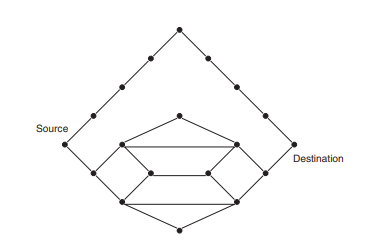

We predict that an ACO algorithm would converge to the suboptimal upper path of the graph since the ACO algorithm would probably have a hard time finding one of the optimal values in the lower part of the graph. The upper path is clearly suboptimal, but very easy to 'find' for the ants. In contrast, the paths in the lower part of the graph, could contain a lot of loops, which would make the path considerably larger than the 'easy' upper path. However, there are considerably shorter paths in this part of the graph, but due to the possible loops, these shorter paths are harder to find than the 'easy' upper path. Furthermore, the two shortest paths of 5 steps, in the lower part of the graph, do contain larger step sizes, which makes these paths even harder to find for the ants considering that the step size is taken into account in the probability formula for an ant when it is 'choosing' its next city. 